In [ ]:
pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3211222 sha256=396df0fc50eaaea3f0da4572d9bf07fd842b5082f812f84889a3aad3121ae8ed
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102546 sha256=52ec6438a3f6329bdcd891e92ee6cfc406ce09b320d60ce9431cb5a512b43289
  Stored in directory: /root/.cache/pip/wheels/d2/ef/9c/da9ceef7d0ff5287c24365844fc394852c2b79ac3fcf33bf8b
Successfully built GPy paramz


In [ ]:
pip install emukit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.0 MB/s eta 0:00:00
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257055 sha256=3e87bfb25ae4632828ab2cd4a4915c13ff9dbb1570f21b5757a0b74384fcc4ce
  Stored in directory: /root/.cache/pip/wheels/30/d1/af/64ddede19b5eb77bd70362edebf9d393bf77dc34d354c11292
Successfully built emukit


In [ ]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

## Generate samples from the Forrester function




x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
# x_train_h = np.array([[70,100],[70,0],[40,0],[40,100],[50,50],[60,80]])

# y_train_l =  np.array([4.5608,3.9654,3.7805,3.5478,2.5223,2.333,2.1315,1.4417,1.1671,1.0813,0.99393,0.82499,0.75554,0.63434,0.49856])
# y_train_h = np.array([ 4.7628,3.5457,0.6215,0.88475,1.2605,2.4286])






# x_train_l =  np.array([[70,100],[70,80],[70,30],[70,0],[60,100],[60,80],[60,50],[50,100],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0],])

y_train_l =  np.array([1.1136,	1.1448,	1.1498,	1.1135,	1.1212,	0.65429,	0.66409,	0.66862	,0.72869,	0.71305,	0.42707,	0.42697,	0.44437,	0.46222,	0.44513	,0.29355,	0.2906,	0.28378,	0.28449,	0.24059]).reshape(-1,1)
y_train_h = np.array([[0.37108,0.26649,0.13965,0.044063,0.019681,0]]).reshape(-1,1)

In [ ]:
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

Y_train=np.append(y_train_l,y_train_h,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

(26, 3)
(26, 1)


In [ ]:
print(X_train)
Y_train=np.reshape(Y_train,(len(X_train),1))
print(Y_train)

[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]
[[1.1136  ]
 [1.1448  ]
 [1.1498  ]
 [1.1135  ]
 [1.1212  ]
 [0.65429 ]
 [0.66409 ]
 [0.66862 ]
 [0.72869 ]
 [0.71305 ]
 [0.42707 ]
 [0.42697 ]
 [0.44437 ]
 [0.46222 ]
 [0.44513 ]
 [0.29355 ]
 [0.2906  ]
 [0.28378 ]
 [0.28449 ]
 [0.24059 ]
 [0.37108 ]
 [0.26649 ]
 [0.13965 ]
 [0.044063]
 [0.019681]
 [0.      ]]


In [ ]:
kernels = [GPy.kern.ExpQuad(input_dim=1,lengthscale=10,variance=0),GPy.kern.ExpQuad(input_dim=1,lengthscale=10,variance=0)]

lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)


lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=20)

## Fit the model

lin_mf_model.optimize()


Optimization restart 1/20, f = 515986741.9750522


 /usr/local/lib/python3.10/dist-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel
 /usr/local/lib/python3.10/dist-packages/GPy/kern/src/stationary.py:199: RuntimeWarning:invalid value encountered in true_divide
 /usr/local/lib/python3.10/dist-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 2/20, f = 698231.1672541777
Optimization restart 3/20, f = 698231.1672631714
Optimization restart 4/20, f = 698231.1672522387
Optimization restart 5/20, f = 698232.6273865942
Optimization restart 6/20, f = 698231.2141225117
Optimization restart 7/20, f = 698231.1676121871
Optimization restart 8/20, f = 698237.3959355594
Optimization restart 9/20, f = 698231.2010567118
Optimization restart 10/20, f = 698231.1676518557
Optimization restart 11/20, f = 698233.919120774
Optimization restart 12/20, f = 698231.1676440213
Optimization restart 13/20, f = 698231.1676649995
Optimization restart 14/20, f = 698231.2271501718
Optimization restart 15/20, f = 698231.164235002
Optimization restart 16/20, f = 698231.1654061363
Optimization restart 17/20, f = 698231.1676442781
Optimization restart 18/20, f = 698231.1675808788
Optimization restart 19/20, f = 698231.1653702046
Optimization restart 20/20, f = 698236.2896904702


In [ ]:

 print(gpy_lin_mf_model)
 # Get the gradients of optimization
gradients_mf = gpy_lin_mf_model.multifidelity.gradient

# Get the names of the model's parameters
parameter_mf = gpy_lin_mf_model.multifidelity.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_mf)):
    print(f"Parameter: {parameter_mf[i]} - Gradient: {gradients_mf[i]}")


Name : gp
Objective : 698231.164235002
Number of Parameters : 7
Number of Optimization Parameters : 5
Updates : True
Parameters:
  gp.                                    |                  value  |  constraints  |  priors
  multifidelity.ExpQuad.variance         |     0.5078702966651367  |      +ve      |        
  multifidelity.ExpQuad.lengthscale      |      0.306470275308313  |      +ve      |        
  multifidelity.ExpQuad_1.variance       |  0.0025136929587968307  |      +ve      |        
  multifidelity.ExpQuad_1.lengthscale    |     0.6961138141134784  |      +ve      |        
  multifidelity.scale                    |     0.2369477612539968  |               |        
  mixed_noise.Gaussian_noise.variance    |                    0.0  |   +ve fixed   |        
  mixed_noise.Gaussian_noise_1.variance  |                    0.0  |   +ve fixed   |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: -0.027982842777781833
Parameter: ExpQuad.lengthscale - Grad

In [ ]:
## Compute mean and variance predictions
#testx = np.linspace(40,70, 100, endpoint=True)

#testy= np.linspace(0,100, 100, endpoint=True)


#x = [(a, b) for a in testx for b in testy]
#x=np.array([x])
#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,0],[60,30],[50,80],[40,30]])
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]

print(x_plot)

[[70 50]
 [60  0]
 [60 30]
 [50 80]
 [40 30]]


In [ ]:


## Compute mean predictions and associated variance

## Compute mean predictions and associated variance

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)


hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)






In [ ]:
print(lf_mean_lin_mf_model)

[[1.12858001]
 [0.68574799]
 [0.68574799]
 [0.44115199]
 [0.27860199]]


In [ ]:
print(hf_mean_lin_mf_model)

[[0.3187849 ]
 [0.13965009]
 [0.13965009]
 [0.04406324]
 [0.00984061]]


In [ ]:
print(hf_var_lin_mf_model)

[[4.99999006e-09]
 [9.99996022e-09]
 [9.99996022e-09]
 [9.99996022e-09]
 [4.99999005e-09]]


In [ ]:
print(np.sqrt((hf_var_lin_mf_model))*1.96)

[[0.00013859]
 [0.000196  ]
 [0.000196  ]
 [0.000196  ]
 [0.00013859]]


In [ ]:
## Create standard GP model using only high-fidelity data
x_train_DNS=np.array([[70,100],[70,50],[70,0],[60,80],[60,30],[60,0],[50,80],[50,50],[40,100],[40,30],[40,0]])
y_train_DNS=np.array([0.37108,	0.29883,	0.26649,	0.13965,	0.20899,	0.080584,	0.045048,	0.044063,	0.019681,	0.017602,	6.30E-09])


x_train_DNS=np.c_[ x_train_DNS, np.ones(len(x_train_DNS)) ]
y_train_DNS=np.reshape(y_train_DNS,(len(x_train_DNS),1))


kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.1, ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,1000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(0)

## Fit the GP model

high_gp_model.optimize_restarts(5)

Optimization restart 1/5, f = -7.902085938590226
Optimization restart 2/5, f = -7.90208593847989
Optimization restart 3/5, f = -7.902085938592535
Optimization restart 4/5, f = -7.902085938591318
Optimization restart 5/5, f = -7.902085938587144


In [ ]:
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)


In [ ]:
# print(hf_mean_high_gp_model)
print(hf_mean_lin_mf_model)
print((np.sqrt(hf_var_lin_mf_model)))
print(hf_mean_high_gp_model)


[[0.3187849 ]
 [0.13965009]
 [0.13965009]
 [0.04406324]
 [0.00984061]]
[[7.07106078e-05]
 [9.99998011e-05]
 [9.99998011e-05]
 [9.99998011e-05]
 [7.07106078e-05]]
[[0.29883   ]
 [0.08058433]
 [0.20898973]
 [0.04504766]
 [0.01760203]]


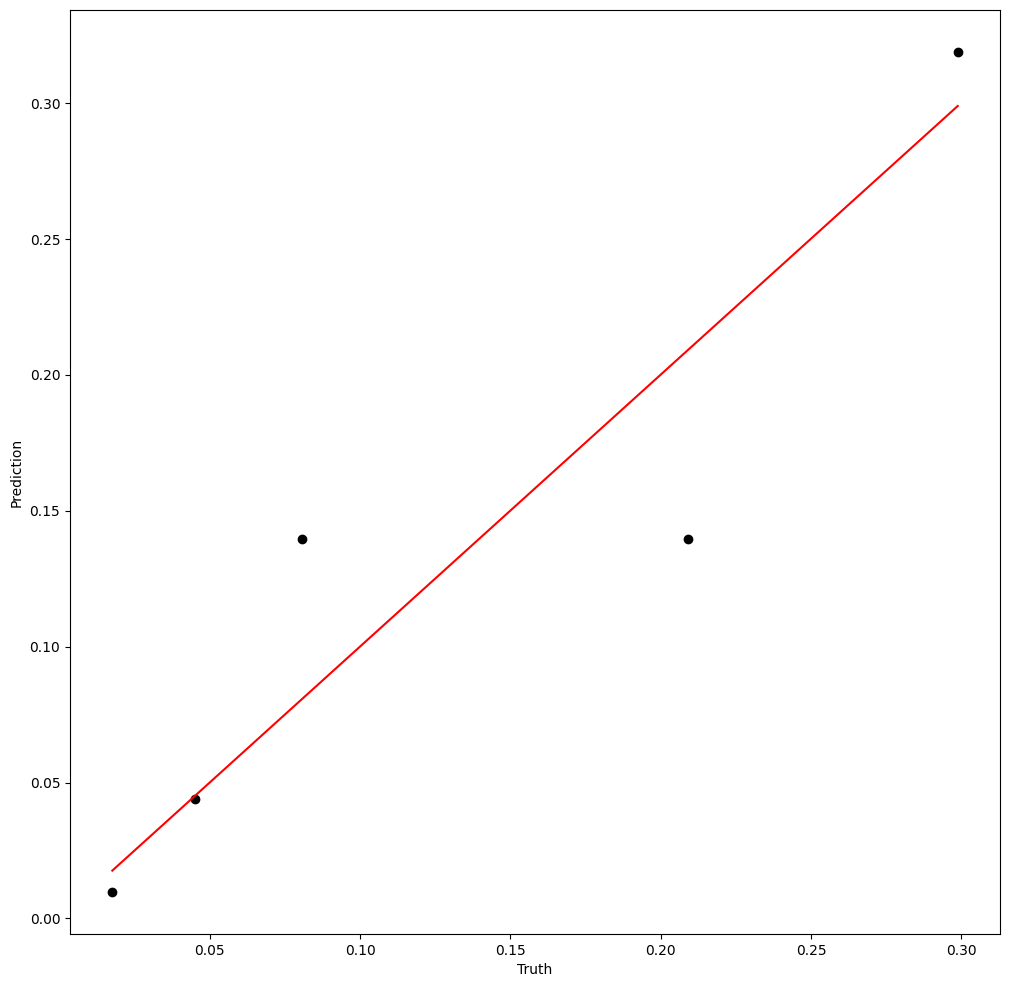

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter( hf_mean_high_gp_model,hf_mean_lin_mf_model, c='black')
min_max = [hf_mean_high_gp_model.min(),hf_mean_high_gp_model.max()]
plt.plot(min_max, min_max, color='r')
plt.xlabel('Truth')
plt.ylabel('Prediction');

In [ ]:
truth=np.array([[0.29883,0.10899,0.10584,0.045048,0.017602]]).reshape(-1,1)



 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning:

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning:

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



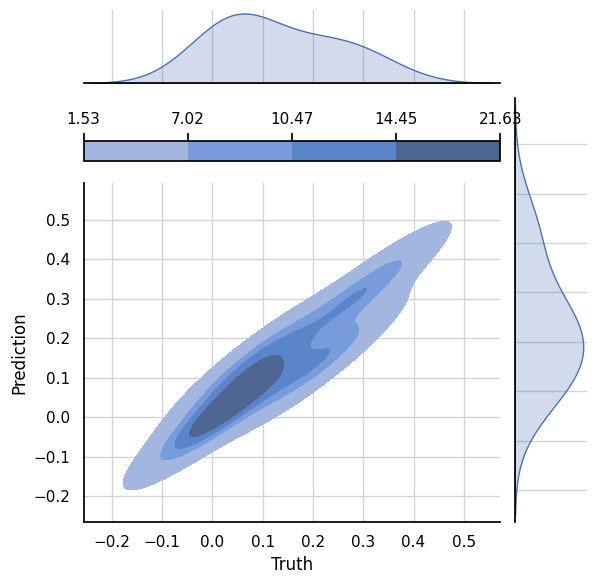

In [ ]:
import pandas as pd
import seaborn as sns

df=pd.DataFrame({'Truth': truth.flatten(),'Prediction':hf_mean_lin_mf_model.flatten()})
# sns.set(font={'family':'serif', 'size':12})
sns.set(font={'family':'serif', 'size':12}, rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.edgecolor':'black', 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'grid.color':'lightgray'})

rel=sns.jointplot(x="Truth", y="Prediction", kind = "kde",data = df, fill=True, n_levels = 5, shade = True, cbar = True, shade_lowest = False, cbar_kws={"location":   "top"})
#rel.fig.suptitle("k=0.96")

plt.show()


 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning:

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning:

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



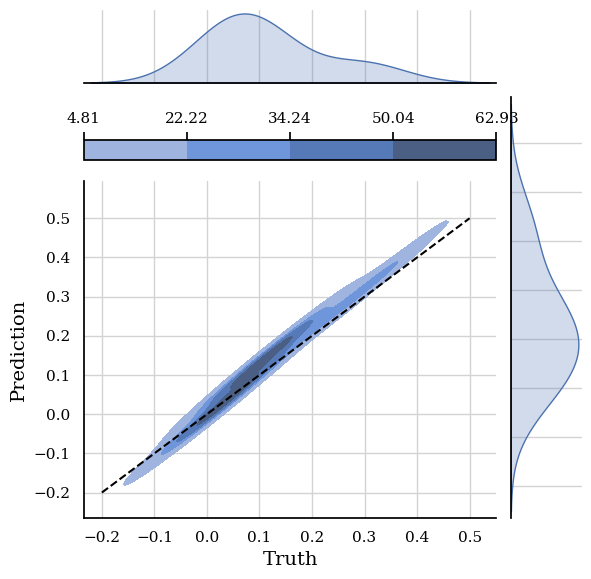

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({'Truth': truth.flatten(), 'Prediction': hf_mean_lin_mf_model.flatten()})

# Set seaborn and matplotlib font settings
sns.set(font_scale=1.0, style="whitegrid", rc={
    'font.family': 'serif',
    'font.size': 14,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'lightgray'
})

# Create the jointplot
rel = sns.jointplot(x="Truth", y="Prediction", kind="kde", data=df, fill=True, n_levels=5, shade=True, cbar=True, shade_lowest=False, cbar_kws={"location": "top"})
rel.set_axis_labels("Truth", "Prediction", fontsize=14)

# Calculate the minimum and maximum values for the 45-degree line
min_val = min(-0.2,-0.2)
max_val = max(0.5,0.5)
x = [min_val, max_val]
y = [min_val, max_val]

# Plot the 45-degree line
rel.ax_joint.plot(x, y, linestyle='dashed', color='black')

# Show the plot
plt.show()



In [ ]:
y_data=hf_mean_lin_mf_model.reshape(-1,1)
y_hf=truth.reshape(-1,1)


ci96=np.sqrt(hf_var_lin_mf_model)*1.96
ci=ci96.reshape(-1,1)
write_mf = np.stack((y_data,y_hf), axis = 1).reshape(-1,2)
write_hf = np.stack((y_hf,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)
print(write_mf.shape)

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MFintTKE.dat', write_mf, delimiter=' ,' )

np.savetxt('/content/drive/MyDrive/ColabNotebooks/HFintTKE.dat', write_hf, delimiter=' ,' )

(5, 2)
(5, 2)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


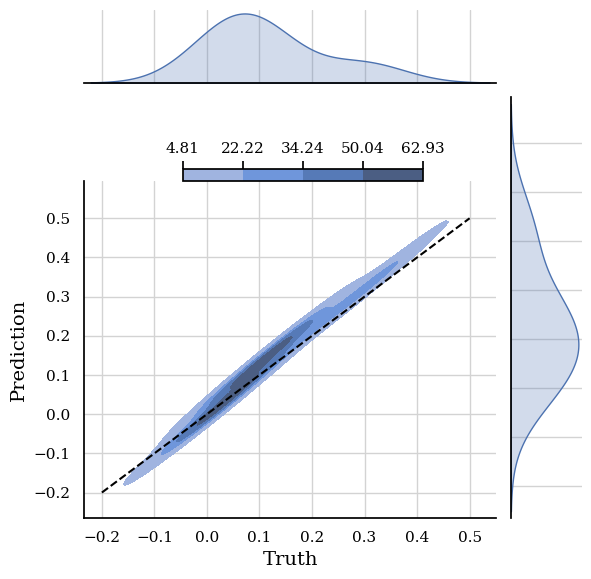

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({'Truth': truth.flatten(), 'Prediction': hf_mean_lin_mf_model.flatten()})

# Set seaborn and matplotlib font settings
sns.set(font_scale=1.0, style="whitegrid", rc={
    'font.family': 'serif',
    'font.size': 14,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'lightgray'
})

# Create the jointplot with custom contour levels
rel = sns.jointplot(x="Truth", y="Prediction", kind="kde", data=df, fill=True, n_levels=5, thresh=0.05, cbar=True, cbar_kws={"location": "top"})
rel.set_axis_labels("Truth", "Prediction", fontsize=14)

# Calculate the minimum and maximum values for the 45-degree line
min_val = min(-0.2, -0.2)
max_val = max(0.5, 0.5)
x = [min_val, max_val]
y = [min_val, max_val]

# Plot the 45-degree line
rel.ax_joint.plot(x, y, linestyle='dashed', color='black')

# Adjust the size and position of the colorbar
cbar_ax = rel.fig.axes[-1]
cbar_ax.set_position([.25, .68, .5, .02])  # [left, bottom, width, height]



from google.colab import drive
drive.mount('/content/drive')

plt.savefig('/content/drive/MyDrive/my_figure.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({'Truth': truth.flatten(), 'Prediction': hf_mean_lin_mf_model.flatten()})

# Set seaborn and matplotlib font settings
sns.set(font_scale=1.5, style="whitegrid", rc={
    'font.family': 'serif',
    'font.size': 12,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'lightgray'
})

# Create the jointplot with adjusted KDE range
rel = sns.jointplot(x="Truth", y="Prediction", kind="kde", data=df, fill=True, n_levels=5, shade=True, cbar=True, shade_lowest=False, cbar_kws={"location": "top"}, bw_method=0.1)
rel.set_axis_labels("Truth", "Prediction", fontsize=12)

# Adjust tick length and make them Times font
for tick in rel.ax_joint.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(5)
    tick.tick1line.set_markeredgewidth(1)
    tick.label1.set_fontname('Times New Roman')
for tick in rel.ax_joint.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(5)
    tick.tick1line.set_markeredgewidth(1)
    tick.label1.set_fontname('Times New Roman')

rel.ax_joint.collections[0].set_label("Density")
rel.ax_joint.legend(fontsize=12)

# Add a dashed line at 45 degrees
import numpy as np
x = np.linspace(min(df['Truth'].min(), df['Prediction'].min()), max(df['Truth'].max(), df['Prediction'].max()), 100)
rel.ax_joint.plot(x, x, linestyle='dashed', color='black')

# Save the plot as PDF
plt.savefig('my_figure.pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df = pd.DataFrame({'Truth': truth.flatten(), 'Prediction': hf_mean_lin_mf_model.flatten()})

# Set seaborn and matplotlib font settings
sns.set(font_scale=1.0, style="whitegrid", rc={
    'font.family': 'times',
    'font.size': 12,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'lightgray'
})

# Custom contour levels
contour_levels = [0.01, 0.05, 0.1, 0.2, 0.3]

# Create the jointplot with custom contour levels
rel = sns.jointplot(x="Truth", y="Prediction", kind="kde", data=df, fill=True, n_levels=len(contour_levels), levels=contour_levels, cbar=True, shade_lowest=False, cbar_kws={"location": "top"})
rel.set_axis_labels("Truth", "Prediction", fontsize=12)

# Adjust tick length and make them Times font
for tick in rel.ax_joint.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(5)
    tick.tick1line.set_markeredgewidth(1)
    tick.label1.set_fontname('Times New Roman')
for tick in rel.ax_joint.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(5)
    tick.tick1line.set_markeredgewidth(1)
    tick.label1.set_fontname('Times New Roman')

rel.ax_joint.collections[0].set_label("Density")
rel.ax_joint.legend(fontsize=12)

# Calculate the minimum and maximum values for the 45-degree line
min_val = min(-0.2, -0.2)
max_val = max(0.5,0.5)
x = np.linspace(min_val, max_val, 100)

# Plot the 45-degree line
rel.ax_joint.plot(x, x, linestyle='dashed', color='black')

# Save the plot as PDF
plt.savefig('my_figure.pdf', bbox_inches='tight')

# Show the plot
plt.show()

